# San Francisco Salary Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [103]:
df = pd.read_csv("/Users/shalu/Downloads/archive/Salaries.csv")

/var/folders/gg/zmzzc3ks1lndnw2n_96m028w0000gn/T/ipykernel_35107/2918512344.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/Users/shalu/Downloads/archive/Salaries.csv")


In [3]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [4]:
df.tail()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148653,148654,Joe Lopez,"Counselor, Log Cabin Ranch",0.00,0.00,-618.13,0.00,-618.13,-618.13,2014,NaN,San Francisco,PT


In [6]:
df.shape

(148654, 13)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


In [8]:
df.describe()

,Id,TotalPay,TotalPayBenefits,Year,Notes
count,148654.000000,148654.000000,148654.000000,148654.000000,0.0
mean,74327.500000,74768.321972,93692.554811,2012.522643,NaN
std,42912.857795,50517.005274,62793.533483,1.117538,NaN
min,1.000000,-618.130000,-618.130000,2011.000000,NaN
25%,37164.250000,36168.995000,44065.650000,2012.000000,NaN
50%,74327.500000,71426.610000,92404.090000,2013.000000,NaN
75%,111490.750000,105839.135000,132876.450000,2014.000000,NaN
max,148654.000000,567595.430000,567595.430000,2014.000000,NaN


In [11]:
df.dtypes

Id                    int64
EmployeeName         object
JobTitle             object
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status               object
dtype: object

In [14]:
print("No. of Rows are", df.shape[0])

No. of Rows are 148654


In [16]:
print("No. of column are", df.shape[1])

No. of column are 13


In [21]:
df.isnull().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [24]:
df.drop(['Benefits','Year',"Status"],axis=1,inplace=True)

In [26]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'TotalPay', 'TotalPayBenefits', 'Notes', 'Agency'],
      dtype='object')

In [34]:
#Find no. of occurences
df.EmployeeName.value_counts(ascending=False).head(9)

Kevin Lee       13
Richard Lee     11
Steven Lee      11
William Wong    11
Stanley Lee      9
KEVIN LEE        9
Michael Wong     9
John Chan        9
Victor Lee       8
Name: EmployeeName, dtype: int64

[Text(0.5, 1.0, 'No. of occurences')]

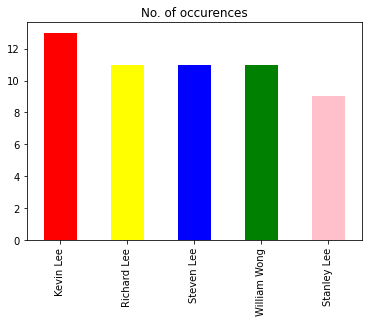

In [40]:
#Plot a coloured bar for no. of occurences 

df.EmployeeName.value_counts(ascending=False).head(5).plot.bar(color=['red','yellow','blue','green','pink']).set(title='No. of occurences')

In [46]:
jt=df.JobTitle.unique()

In [48]:
len(jt)

2159

In [50]:
df.JobTitle.nunique()

2159

In [55]:
len(df[df.JobTitle.str.contains('CAPTAIN',case=False)])

552

In [58]:
df.BasePay

0            167411.18
1            155966.02
2            212739.13
3              77916.0
4             134401.6
              ...     
148649            0.00
148650    Not Provided
148651    Not Provided
148652    Not Provided
148653            0.00
Name: BasePay, Length: 148654, dtype: object

In [107]:
df.BasePay= df.BasePay.replace("Not Provided",np.nan)

In [61]:
df.BasePay


0         167411.18
1         155966.02
2         212739.13
3           77916.0
4          134401.6
            ...    
148649         0.00
148650          NaN
148651          NaN
148652          NaN
148653         0.00
Name: BasePay, Length: 148654, dtype: object

In [64]:
df.BasePay.isna().sum()

609

In [65]:
df.BasePay.isna()

0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650     True
148651     True
148652     True
148653    False
Name: BasePay, Length: 148654, dtype: bool

In [70]:
df.BasePay.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
148649    False
148650     True
148651     True
148652     True
148653    False
Name: BasePay, Length: 148654, dtype: bool

In [72]:
random=pd.DataFrame(df.BasePay.isnull())

In [73]:
random.head()

,BasePay
0,False
1,False
2,False
3,False
4,False


In [84]:
random[random.BasePay==True].value_counts()

BasePay
True       609
dtype: int64

In [87]:
df[df.EmployeeName=='ALBERT PARDINI']['TotalPay']

2    335279.91
Name: TotalPay, dtype: float64

In [91]:
df.BasePay = df.BasePay.astype('float64')
df.BasePay.max()

319275.01

In [101]:
df[df.BasePay==df.BasePay.max()]['TotalPay']

72925    339282.07
Name: TotalPay, dtype: float64

In [104]:
df.head(1)

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN


In [108]:
df.BasePay=df.BasePay.astype('float64')
df.groupby('Year')['BasePay'].mean()

Year
2011    63595.956517
2012    65436.406857
2013    69630.030216
2014    66564.421924
Name: BasePay, dtype: float64

<AxesSubplot:xlabel='Year'>

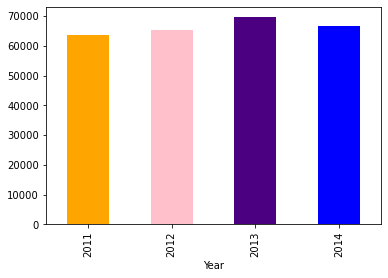

In [110]:
df.groupby('Year')['BasePay'].mean().plot.bar(color=['orange','pink','indigo','blue'])

In [120]:
df.groupby('JobTitle')['BasePay'].mean().sort_values(ascending=False).head(5)

JobTitle
Chief of Police                           309767.683333
Chief, Fire Department                    304232.340000
Gen Mgr, Public Trnsp Dept                297769.413333
CHIEF OF DEPARTMENT, (FIRE DEPARTMENT)    285262.000000
Dep Dir for Investments, Ret              276153.765000
Name: BasePay, dtype: float64

In [121]:
df[df.JobTitle=='ACCOUNTANT']['BasePay'].mean()

46643.172

In [125]:
df.JobTitle.value_counts().head(5)

Transit Operator                7036
Special Nurse                   4389
Registered Nurse                3736
Public Svc Aide-Public Works    2518
Police Officer 3                2421
Name: JobTitle, dtype: int64

<AxesSubplot:>

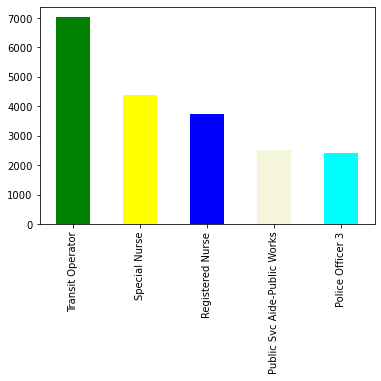

In [128]:
df.JobTitle.value_counts().head(5).plot.bar(color=['green','yellow','blue','beige','cyan'])